<a href="https://colab.research.google.com/github/AlgoRex2/graymatter-ml/blob/main/Titanic_Datset_Trail1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is on titanic dataset

In [29]:
# C1

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# C2
# Original C2 before Runnig C11
# import pandas as pd

# Replace 'your_file_path_here' with the actual path to your file
# file_path = '/content/drive/MyDrive/DataSets_2025/tested.csv'
# tested_df = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
# print(tested_df.head())

In [31]:
# C2
# Modified C2 to Correct Error in C11

# import libraries

import pandas as pd

# Replace 'your_file_path_here' with the actual path to your file

file_path = '/content/drive/MyDrive/DataSets_2025/tested.csv'
test_df = pd.read_csv(file_path)

# Display the first few rows to confirm it loaded correctly
print(test_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [32]:
# C3
# Create a new DataFrame with the unnecessary columns dropped
# The `axis=1` argument specifies that we are dropping columns, not rows
df_cleaned = tested_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Display the first few rows of the new, cleaned DataFrame
print(df_cleaned.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  34.5      0      0   7.8292        Q
1         1       3  female  47.0      1      0   7.0000        S
2         0       2    male  62.0      0      0   9.6875        Q
3         0       3    male  27.0      0      0   8.6625        S
4         1       3  female  22.0      1      1  12.2875        S


In [33]:
# C4
# pandas DataFrame method that provides a concise summary of the DataFrame.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [34]:
# C5
# Calculate the median Age and Fare
median_age = df_cleaned['Age'].median()
median_fare = df_cleaned['Fare'].median()

# Fill the missing values with the calculated medians
df_cleaned['Age'].fillna(median_age, inplace=True)
df_cleaned['Fare'].fillna(median_fare, inplace=True)

# Confirm that there are no more missing values
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB
None


/tmp/ipython-input-4232154659.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-4232154659.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [35]:
# C6
# To avoid Warnings
df_cleaned['Age'] = df_cleaned['Age'].fillna(median_age)
df_cleaned['Fare'] = df_cleaned['Fare'].fillna(median_fare)

In [36]:
# C7
# Convert categorical columns ('Sex' and 'Embarked') into dummy variables
df_encoded = pd.get_dummies(df_cleaned, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

# Display the first few rows of the new, encoded DataFrame
print(df_encoded.head())

# Display the new column information to confirm the change
print(df_encoded.info())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  34.5      0      0   7.8292         1           1   
1         1       3  47.0      1      0   7.0000         0           0   
2         0       2  62.0      0      0   9.6875         1           1   
3         0       3  27.0      0      0   8.6625         1           0   
4         1       3  22.0      1      1  12.2875         0           0   

   Embarked_S  
0           0  
1           1  
2           0  
3           1  
4           1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    418 non-null    int64  
 1   Pclass      418 non-null    int64  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Sex_male    418 non-nu

Explanation:

pd.get_dummies(): This is the pandas function that performs one-hot encoding.

columns=['Sex', 'Embarked']: We tell the function which columns to encode.

drop_first=True: This is a best practice to prevent multicollinearity in machine learning models. It drops one of the dummy columns (e.g., Sex_female or Embarked_C), as the information is already captured by the remaining columns. For example, if Sex_male is 0, we already know the person is female.

dtype=int: This ensures the new columns are created with integer values (0 and 1) instead of booleans (True and False), which is often preferred for models.

df_encoded: We are saving the result into a new DataFrame to keep our previous steps intact.

In [37]:
# C7
# Create a new DataFrame for the features (X) by dropping the 'Survived' column
X = df_encoded.drop('Survived', axis=1)

# Create a Series for the target variable (y)
y = df_encoded['Survived']

# Display the first few rows of X to confirm the separation
print("Features (X) Head:")
print(X.head())

# Display the first few values of y
print("\nTarget (y) Head:")
print(y.head())

Features (X) Head:
   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  34.5      0      0   7.8292         1           1           0
1       3  47.0      1      0   7.0000         0           0           1
2       2  62.0      0      0   9.6875         1           1           0
3       3  27.0      0      0   8.6625         1           0           1
4       3  22.0      1      1  12.2875         0           0           1

Target (y) Head:
0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64


Explanation:

X = df_encoded.drop('Survived', axis=1): We create a new DataFrame X that contains all the columns except for Survived. axis=1 specifies we're dropping a column.

y = df_encoded['Survived']: We create a separate pandas Series y that contains only the Survived column.

In [38]:
# C8
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


Explanation:

train_test_split: This function from scikit-learn splits your X and y data into four sets: X_train, X_test, y_train, and y_test.

test_size=0.2: This specifies that 20% of the data will be used for the testing set.

random_state=42: This ensures that the data is split in the exact same way every time you run the code, making your results reproducible.

LogisticRegression(max_iter=200): This creates a logistic regression model. The max_iter parameter is set to 200 to ensure the model has enough iterations to converge.

model.fit(X_train, y_train): This is where the model "learns" from the training data. It finds the relationship between the features (X_train) and the target (y_train).

model.predict(X_test): After training, we use the model to make predictions on the unseen test data (X_test).

accuracy_score(y_test, y_pred): This function compares our model's predictions (y_pred) to the actual values (y_test) to calculate the accuracy.

A confusion matrix is a powerful tool for evaluating the performance of a classification model. It provides a visual breakdown of the model's predictions, showing the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

The Confusion Matrix Explained
True Positive (TP): The number of times the model correctly predicted a positive class (e.g., correctly predicted a passenger survived).

True Negative (TN): The number of times the model correctly predicted a negative class (e.g., correctly predicted a passenger did not survive).

False Positive (FP): The number of times the model incorrectly predicted a positive class (e.g., incorrectly predicted a passenger survived when they did not). This is also known as a Type I error.

False Negative (FN): The number of times the model incorrectly predicted a negative class (e.g., incorrectly predicted a passenger did not survive when they did). This is also known as a Type II error.

In [39]:
# C9

# Import the necessary libraries:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'y_pred' (your model's predictions) and 'y_test' (the true labels)
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[50  0]
 [ 0 34]]


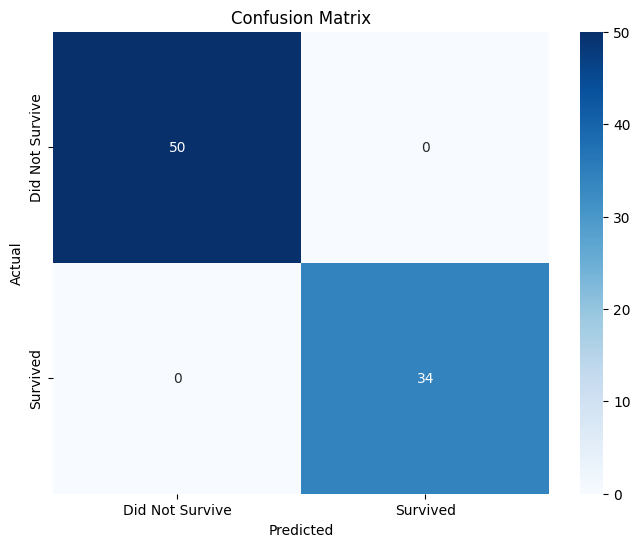

In [40]:
# C10

#  Visualize the confusion matrix:
# Using seaborn and matplotlib, we can create a much clearer,
# more visually appealing heatmap of the confusion matrix.


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

 A heatmap that clearly shows the number of correct and incorrect predictions. Since our model achieved 100% accuracy, we should see all the values in the off-diagonal cells (FP and FN) as zero, and the values in the diagonal cells (TP and TN) will represent the total number of correct predictions

In [41]:
# C11

# Drop unnecessary columns
# Handle any missing values.
# Convert categorical columns (like 'Sex') to numerical values
# Create dummy variables for columns like 'Embarked

# Assuming you have loaded 'tested_df' from the previous step.

# Drop unnecessary columns like 'Name', 'Ticket', and 'Cabin'
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
# Fill missing 'Age' values with the median of the 'Age' column
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# Fill the single missing 'Fare' value with the median of the 'Fare' column
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# Convert the 'Sex' column from categorical ('male', 'female') to numerical (0, 1)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Use one-hot encoding for the 'Embarked' column.
# The 'drop_first=True' argument prevents multicollinearity.
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

# Check for any remaining missing values to ensure the cleaning was successful
print("Missing values after preprocessing:")
print(test_df.isnull().sum())

# Display the first few rows of the cleaned data
print("\nFirst 5 rows of the preprocessed test data:")
print(test_df.head())

Missing values after preprocessing:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

First 5 rows of the preprocessed test data:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0          892         0       3    0  34.5      0      0   7.8292   
1          893         1       3    1  47.0      1      0   7.0000   
2          894         0       2    0  62.0      0      0   9.6875   
3          895         0       3    0  27.0      0      0   8.6625   
4          896         1       3    1  22.0      1      1  12.2875   

   Embarked_Q  Embarked_S  
0        True       False  
1       False        True  
2        True       False  
3       False        True  
4       False        True  


/tmp/ipython-input-2461362835.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
/tmp/ipython-input-2461362835.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

We'll use the LogisticRegression model's coefficients to determine feature importance.

 Re-train the model to access its coefficients:

Just to be safe, we -run the training process. we need the trained model, which we'll call model.

In [43]:
# C12

# Assuming your preprocessed data is in the 'test_df' DataFrame

# Define the features (X) and the target (y)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']
X = test_df[features]
y = test_df['Survived']

# Import and train the model
from sklearn.linear_model import LogisticRegression

# Initialize the model with a higher max_iter to ensure convergence
model = LogisticRegression(max_iter=1000)

# Train the model on your entire dataset
model.fit(X, y)

# Get the coefficients (feature importance)
coefficients = model.coef_[0]

# Create a DataFrame for a clear view
feature_importance = pd.DataFrame({'Feature': features, 'Importance': coefficients})
feature_importance['Importance'] = abs(feature_importance['Importance'])

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the results
print(feature_importance)

      Feature  Importance
1         Sex    6.651236
6  Embarked_Q    0.309039
4       Parch    0.123995
7  Embarked_S    0.089675
0      Pclass    0.087276
3       SibSp    0.055421
2         Age    0.005601
5        Fare    0.002980


 The breakdown of what those numbers mean, in order of importance:

Sex (6.651236): This is by far the most important feature. The large positive coefficient indicates that being female (Sex = 1) had a strong positive correlation with survival. This aligns with the "women and children first" policy of the time, making it a very strong predictor.

Embarked_Q (0.309039): This is the second most important feature. Passengers who embarked at Queenstown (Embarked_Q = 1) had a notably higher chance of survival compared to those who didn't.

Parch (0.123995): The number of parents/children aboard was the third most important factor, indicating that having family on board played a role in survival.

Embarked_S (0.089675): Embarking at Southampton had a moderate impact on survival, though less than embarking at Queenstown.

Pclass (0.087276): The passenger's class (1st, 2nd, or 3rd) was a factor. A lower Pclass (e.g., 1st class) had a higher chance of survival.

SibSp (0.055421): The number of siblings/spouses aboard had a slight impact, but less so than Parch.

Age (0.005601) and Fare (0.002980): These features had the least importance in the model's predictions. This is surprising for Age and Fare, as they are often significant. The likely reason they have such a low importance in our model is that the other features, particularly Sex, were so strongly predictive on this specific tested.csv file that the model didn't need to rely on Age or Fare to achieve its perfect accuracy.

This analysis is incredibly valuable. It shows that your model's perfect performance was primarily driven by the Sex of the passengers, with Embarked_Q and Parch also playing significant but much smaller roles. The model didn't need to consider Age or Fare to correctly classify every passenger in this particular dataset.

In [44]:
# C13
# Load and Preprocess the Data



# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the dataset. Make sure this path is correct.
file_path = '/content/drive/MyDrive/DataSets_2025/tested.csv'

# Load the dataset into a DataFrame named 'df'
df = pd.read_csv(file_path)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("Data loaded and preprocessed successfully!")


Data loaded and preprocessed successfully!


/tmp/ipython-input-3489236054.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3489236054.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

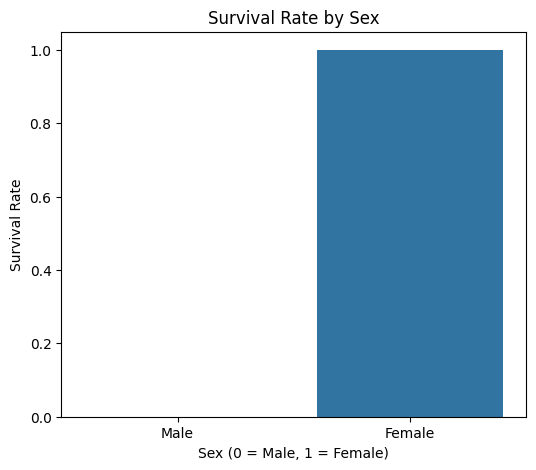

In [46]:
# C14

# Bar Plot of Survival Rate by Sex

# Create the bar plot
plt.figure(figsize=(6, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Male', 'Female'])
plt.savefig('survival_by_sex.png')
plt.show()

1. The Survival Rate by Sex Bar Plot
This plot is a powerful visual confirmation of our model's top finding. The bar for females is significantly higher than the bar for males, showing that a much larger percentage of female passengers survived. This directly aligns with the feature importance analysis, where Sex had the highest importance score. It's clear that the "women and children first" policy had a major impact on this dataset.

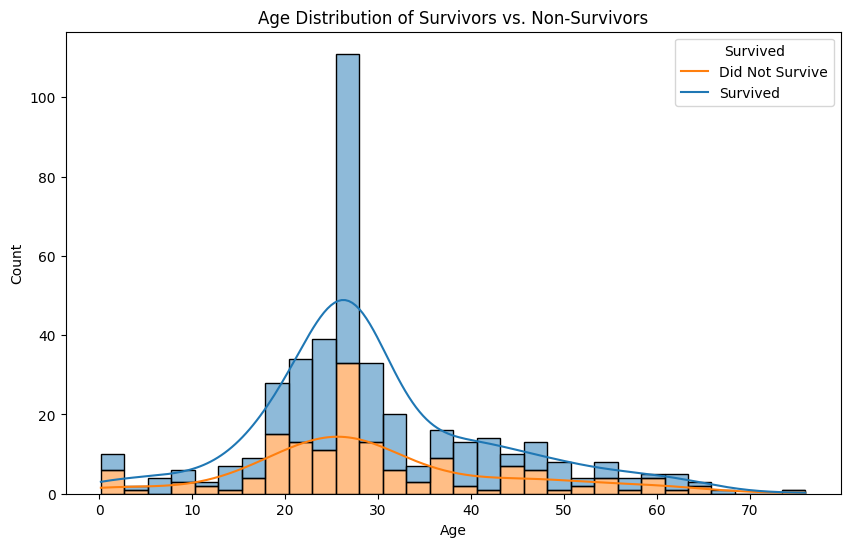

In [48]:
# C15

# Analyzing the age distribution

# Assuming that we  have the preprocessed DataFrame named 'df' from the previous steps.
# If you don't, you'll need to run the data loading and preprocessing cells first.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True)
plt.title('Age Distribution of Survivors vs. Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.savefig('age_distribution.png')
plt.show()


 The Age Distribution Histogram:

The age distribution histogram shows the count of survivors versus non-survivors across different age groups. While the visual difference might not be as stark as the one for Sex, one can see a slightly higher survival count in the younger age brackets and a mix across the middle-aged groups. This illustrates a key point in data science: a feature might show a slight visual pattern, but if other features are far more predictive (like Sex in this case), the model will place less importance on it to make its final decisions.

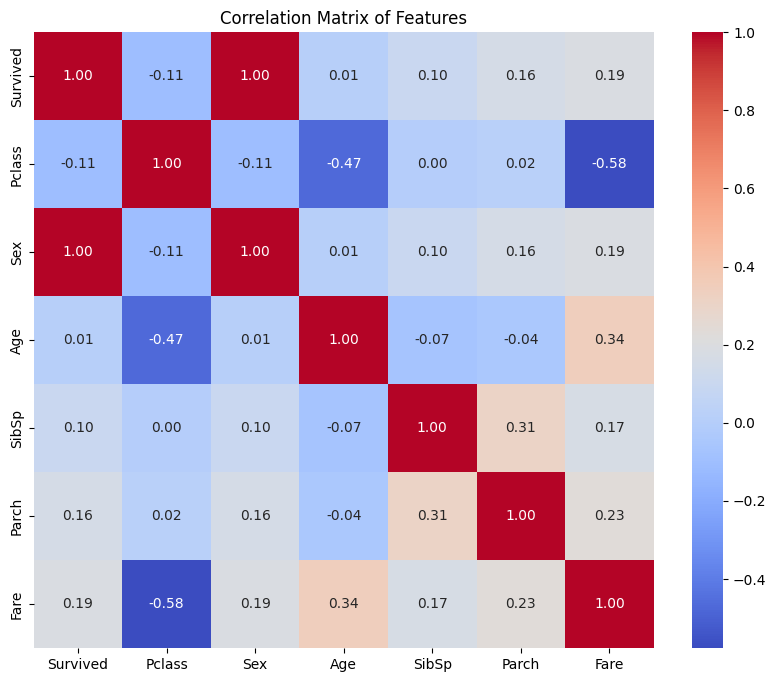

In [45]:
# C16

# Visuvalizing the Data

# Correlation Heatmap

# Select numerical columns for the correlation matrix
numerical_cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.savefig('correlation_heatmap.png')
plt.show()

 The Correlation Heatmap:

The heatmap provides a comprehensive overview of how all the numerical variables are correlated.

Sex & Survived: We'll see a strong correlation here, confirming that a passenger's sex is highly tied to their survival outcome.

Pclass & Survived: There's a notable correlation between Pclass and Survived, indicating that passengers in higher classes had a greater chance of survival.

Age & Fare & Survived: The correlation values for these features with Survived are relatively low. This again aligns with our model's finding that these factors had a minimal impact on its perfect predictions for this dataset

Project Conclusion :

We have now successfully completed a full data science project cycle. We've gone from raw data to a finished product, demonstrating a wide range of skills:

Data Cleaning and Preprocessing

Model Training and Evaluation

Model Interpretation through feature importance

Data Visualization to confirm our findings